In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

* Base com indicadores sociais e econômicos de municípios brasileiros

In [2]:
df = pd.read_csv('municipios.csv')

In [3]:
pd.set_option('display.max_columns', None)
df.head()

,id_municipio,ano,expectativa_vida,fecundidade_total,mortalidade_1,mortalidade_5,razao_dependencia,prob_sobrevivencia_40,prob_sobrevivencia_60,taxa_envelhecimento,expectativa_anos_estudo,taxa_analfabetismo_11_a_14,taxa_analfabetismo_15_a_17,taxa_analfabetismo_15_mais,taxa_analfabetismo_18_a_24,taxa_analfabetismo_18_mais,taxa_analfabetismo_25_a_29,taxa_analfabetismo_25_mais,taxa_atraso_0_basico,taxa_atraso_0_fundamental,taxa_atraso_0_medio,taxa_atraso_1_basico,taxa_atraso_1_fundamental,taxa_atraso_1_medio,taxa_atraso_2_basico,taxa_atraso_2_fundamental,taxa_atraso_2_medio,taxa_freq_bruta_basico,taxa_freq_bruta_fundamental,taxa_freq_bruta_medio,taxa_freq_bruta_pre,taxa_freq_bruta_superior,taxa_freq_liquida_basico,taxa_freq_liquida_fundamental,taxa_freq_liquida_medio,taxa_freq_liquida_pre,taxa_freq_liquida_superior,taxa_freq_0_3,taxa_freq_11_14,taxa_freq_15_17,taxa_freq_18_24,taxa_freq_25_29,taxa_freq_4_5,taxa_freq_4_6,taxa_freq_5_6,taxa_freq_6,taxa_freq_6_14,taxa_freq_6_17,taxa_freq_fundamental_15_17,taxa_freq_fundamental_18_24,taxa_freq_fundamental_4_5,taxa_freq_medio_18_24,taxa_freq_medio_6_14,taxa_freq_superior_15_17,taxa_fundamental_11_13,taxa_fundamental_12_14,taxa_fundamental_15_17,taxa_fundamental_16_18,taxa_fundamental_18_24,taxa_fundamental_18_mais,taxa_fundamental_25_mais,taxa_medio_18_20,taxa_medio_18_24,taxa_medio_18_mais,taxa_medio_19_21,taxa_medio_25_mais,taxa_superior_25_mais,renda_pc_max_quintil_1,renda_pc_max_quintil_2,renda_pc_max_quintil_3,renda_pc_max_quintil_4,renda_pc_max_decil_9,indice_gini,prop_pobreza_extrema,prop_pobreza_extrema_criancas,prop_pobreza,prop_pobreza_criancas,prop_vulner_pobreza,prop_vulner_pobreza_criancas,prop_renda_10_ricos,prop_renda_20_pobres,prop_renda_20_ricos,prop_renda_40_pobres,prop_renda_60_pobres,prop_renda_80_pobres,prop_renda_trabalho,razao_10_ricos_40_pobres,razao_20_ricos_40_pobres,renda_pc,renda_pc_quintil_1,renda_pc_decil_10,renda_pc_quintil_2,renda_pc_quintil_3,renda_pc_quintil_4,renda_pc_quintil_5,renda_pc_exc_renda_nula,renda_pc_pobreza_extrema,renda_pc_pobreza,renda_pc_vulner_pobreza,indice_theil,prop_trabalhadores_conta_proria,prop_empregadores,prop_ocupados_agropecuaria,prop_ocupados_comercio,prop_ocupados_construcao,prop_ocupados_extracao,prop_ocupados_formalizacao,prop_ocupados_fundamental,prop_ocupados_medio,prop_ocupados_servicos,prop_ocupados_siup,prop_ocupados_superior,prop_ocupados_transformacao,prop_ocupados_renda_0,prop_ocupados_renda_1_sm,prop_ocupados_renda_2_sm,prop_ocupados_renda_3_sm,prop_ocupados_renda_5_sm,renda_media_ocupados,taxa_atividade,taxa_atividade_10_14,taxa_atividade_15_17,taxa_atividade_18_24,taxa_atividade_18_mais,taxa_atividade_25_29,taxa_desocupacao,taxa_desocupacao_10_14,taxa_desocupacao_15_17,taxa_desocupacao_18_24,taxa_desocupacao_18_mais,taxa_desocupacao_25_29,indice_treil_trabalho,taxa_ocupados_carteira,taxa_ocupados_setor_publico,taxa_ocupados_sem_carteira,taxa_agua_encanada,taxa_banheiro_agua_encanada,taxa_densidade_2_mais,taxa_coleta_lixo,taxa_energia_eletrica,taxa_agua_esgoto_inadequados,taxa_paredes_inadequados,taxa_criancas_dom_sem_fund,taxa_criancas_fora_escola_4_5,taxa_criancas_fora_escola_6_14,taxa_dom_sem_fund,taxa_dom_vulner_sem_fund,taxa_sem_fund_informal,taxa_mulheres_com_filho_10_14,taxa_mulheres_com_filho_15_17,taxa_mulheres_chefe_filho_15m,taxa_nest_ntrab_vulner_15_24,taxa_vulner_desloc_1_hora,taxa_dom_vulner_dep_idoso,taxa_sem_energia_eletrica,populacao_homens_0_4,populacao_homens_10_14,populacao_homens_15_19,populacao_homens_20_24,populacao_homens_25_29,populacao_homens_30_34,populacao_homens_35_39,populacao_homens_40_44,populacao_homens_45_49,populacao_homens_50_54,populacao_homens_55_59,populacao_homens_5_9,populacao_homens_60_64,populacao_homens_65_69,populacao_homens_70_74,populacao_homens_75_79,populacao_homens,populacao_homens_80_mais,populacao_mulheres_0_4,populacao_mulheres_10_14,populacao_mulheres_15_19,populacao_mulheres_20_24,populacao_mulheres_25_29,populacao_mulheres_30_34,populacao_mulheres_35_39,popul

* Selecionando algumas variáveis

In [4]:
df = df[['ano','expectativa_vida','expectativa_anos_estudo','indice_gini','prop_pobreza_extrema','indice_frequencia_escolar']]

* Selecionando apenas indicadores de 2010

In [5]:
df = df.loc[df['ano'] == 2010] #selecionando apenas indicadores de 2010

* Verificando se há nulos nas colunas

In [6]:
df.isna().sum()

ano                          0
expectativa_vida             0
expectativa_anos_estudo      0
indice_gini                  0
prop_pobreza_extrema         0
indice_frequencia_escolar    0
dtype: int64

* Observando a média das variáveis escolhidas como explicativas

In [7]:
print(df['expectativa_anos_estudo'].mean())
print(df['indice_gini'].mean())
print(df['prop_pobreza_extrema'].mean())
print(df['indice_frequencia_escolar'].mean())

9.463638814016203
0.494380952380953
11.341415992812218
0.6683439353099748


* Boxplot da variável resposta
    * Verificando se há outliers na variável, que influenciaria no modelo

<AxesSubplot:xlabel='expectativa_vida'>

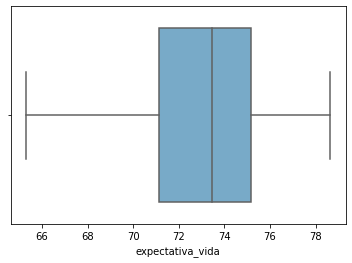

In [8]:
sns.boxplot(x=df["expectativa_vida"], palette="Blues")

* Verificando igualmente se há outliers nas variáveis explicativas
    * Todas possuem, neste caso, poderiam ser feitos alguns tratamentos: categorizar as variáveis, removê-los ou ajustá-los aos valores dos limiares

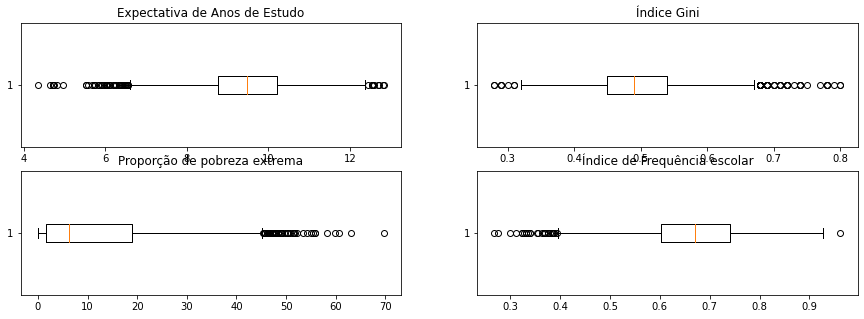

In [9]:
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
ax1.boxplot(df["expectativa_anos_estudo"], vert=False)
ax2.boxplot(df["indice_gini"], vert=False)
ax3.boxplot(df["prop_pobreza_extrema"], vert=False)
ax4.boxplot(df["indice_frequencia_escolar"], vert=False)
ax1.set_title('Expectativa de Anos de Estudo')
ax2.set_title('Índice Gini')
ax3.set_title('Proporção de pobreza extrema')
ax4.set_title('Índice de Frequência escolar')
plt.show()

* Correlaçao entre as variáveis
    * Com a variável resposta: 
        * A principio, há uma correlação significativa entre expectativa de vida com pobreza extrema
        * Com frequência escolar também há uma correlação em relação a expectativa de vida
    * Entre as variáveis explicativas:
        * A variável de expectativa de anos de estudo tem alta correlação com frequência escolar, e explica menos da variável resposta, assim, poderia-se pensar em excluí-la, a princípios, das variáveis explicativas

In [10]:
df[['expectativa_vida','expectativa_anos_estudo','indice_gini','prop_pobreza_extrema','indice_frequencia_escolar']].corr('spearman')

,expectativa_vida,expectativa_anos_estudo,indice_gini,prop_pobreza_extrema,indice_frequencia_escolar
expectativa_vida,1.000000,0.468071,-0.406924,-0.817240,0.673751
expectativa_anos_estudo,0.468071,1.000000,-0.366153,-0.549676,0.767891
indice_gini,-0.406924,-0.366153,1.000000,0.628764,-0.517690
prop_pobreza_extrema,-0.817240,-0.549676,0.628764,1.000000,-0.765108
indice_frequencia_escolar,0.673751,0.767891,-0.517690,-0.765108,1.000000


* Separando entre variável dependente e independente
* Separando entre treino e teste

In [11]:
X = df[['expectativa_anos_estudo','indice_gini','prop_pobreza_extrema','indice_frequencia_escolar']]
Y = df[['expectativa_vida']]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=0)

* Escalagem da variável
    * Como a regressão lasso impõe uma penalização no coeficiente da variável, é recomendável escalar as variáveis explicativas para que suas escalas não influenciem neste termo
    * Utilizando robust scaler para a escalagem
        * Metodo de escalar a variável de forma robusta a outliers
        * Utiliza a mediana e intervalo interquartil para o calculo

In [13]:
from sklearn.preprocessing import RobustScaler

In [14]:
colunas = [
    'expectativa_anos_estudo',
    'indice_gini',
    'prop_pobreza_extrema',
    'indice_frequencia_escolar'
]

In [15]:
escaladas = {}
X_train_escal = X_train.copy()
X_test_escal = X_test.copy()
for col in colunas:
    scaler = RobustScaler()
    scaler.fit(X_train_escal[[col]])
    X_train_escal.loc[:,col] = scaler.transform(X_train_escal[[col]])
    X_test_escal.loc[:,col] = scaler.transform(X_test_escal[[col]])
    escaladas[col] = scaler

In [16]:
X_train_escal.head()

,expectativa_anos_estudo,indice_gini,prop_pobreza_extrema,indice_frequencia_escolar
11654,0.575342,-1.555556,-0.273588,1.194245
11432,0.520548,0.555556,-0.305133,0.784173
11210,0.568493,-0.333333,-0.035561,0.611511
6731,-0.534247,-0.222222,-0.255807,0.021583
10958,0.541096,0.111111,-0.313737,0.784173


In [17]:
X_test_escal.head()

,expectativa_anos_estudo,indice_gini,prop_pobreza_extrema,indice_frequencia_escolar
11960,1.102740,-0.888889,-0.328649,0.683453
2072,-0.047945,0.444444,1.113278,-0.446043
2834,-0.219178,-0.333333,0.793806,-0.021583
7697,-0.986301,0.000000,-0.240895,-0.266187
12086,0.863014,-0.888889,-0.294236,0.755396


* Otimização do hiperparâmetro alpha (termo de penalização dos coeficientes)
    * Define-se o range que o hiperparâmetro poderá assumir - de 0,01 até 5, variando em 0,01
    * Para cada iteração que testar um valor de hiperparâmetro, será calculado as métricas de R2 e erro quadrado médio, visando a avaliação posterior de cada modelo

In [18]:
parametro = {'alpha':[0.0001,0.001,0.01,0.1,0.5,1,5]} #Definiçao do range que o hiperparâmetro será testado
scoring = {'R2': 'r2', 'Erro Quadrado médio': 'neg_mean_squared_error'} # Métricas de qualidade do modelo a serem calculadas

* Construção do modelo
    * A escolha do melhor hiperparâmetro sera realizado via cross-validation, definindo o valor que resulta no modelo com menor erro quadrado médio (refit = 'Erro Quadrado Médio')

In [19]:
lasso = GridSearchCV(Lasso(max_iter=100000,random_state=0), parametro, scoring = scoring, refit = 'Erro Quadrado médio', 
                     cv=10) #pelo refit define-se qual métrica será referência para escolher o melhor modelo
lasso.fit(X_train_escal,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=100000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5]},
             pre_dispatch='2*n_jobs', refit='Erro Quadrado médio',
             return_train_score=False,
             scoring={'Erro Quadrado médio': 'neg_mean_squared_error',
                      'R2': 'r2'},
             verbose=0)

In [20]:
# Melhor modelo tem hiperparametro igual a 0,0001 e produz um erro quadrático médio de 2,71 na base de treino (cross-validation)
print(lasso.best_estimator_.alpha)
print(lasso.best_score_)

0.0001
-2.7188688727893044


In [21]:
#Inserindo os resultados das iterações do modelo em um dataframe
resultados = lasso.cv_results_
resultados = pd.DataFrame.from_dict(resultados)

In [22]:
pd.set_option('display.max_columns', None)
resultados

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_R2,split1_test_R2,split2_test_R2,split3_test_R2,split4_test_R2,split5_test_R2,split6_test_R2,split7_test_R2,split8_test_R2,split9_test_R2,mean_test_R2,std_test_R2,rank_test_R2,split0_test_Erro Quadrado médio,split1_test_Erro Quadrado médio,split2_test_Erro Quadrado médio,split3_test_Erro Quadrado médio,split4_test_Erro Quadrado médio,split5_test_Erro Quadrado médio,split6_test_Erro Quadrado médio,split7_test_Erro Quadrado médio,split8_test_Erro Quadrado médio,split9_test_Erro Quadrado médio,mean_test_Erro Quadrado médio,std_test_Erro Quadrado médio,rank_test_Erro Quadrado médio
0,0.005219,0.006663,0.002012,0.000028,0.0001,{'alpha': 0.0001},0.617389,0.648245,0.566244,0.624477,0.632218,0.670361,0.632726,0.641193,0.617993,0.572670,0.622352,0.030331,2,-2.823087,-2.317427,-3.105010,-2.978889,-2.905372,-2.285006,-2.619056,-2.520075,-2.741894,-2.892872,-2.718869,0.263067,1
1,0.003011,0.000357,0.001799,0.000401,0.0010,{'alpha': 0.001},0.617302,0.648458,0.566331,0.624465,0.631941,0.670259,0.632763,0.641228,0.617899,0.572902,0.622355,0.030277,1,-2.823725,-2.316022,-3.104388,-2.978983,-2.907565,-2.285715,-2.618788,-2.519830,-2.742563,-2.891302,-2.718888,0.263196,2
2,0.002864,0.000186,0.001703,0.000455,0.0100,{'alpha': 0.01},0.616109,0.650203,0.566926,0.624055,0.628822,0.668919,0.632724,0.641219,0.616675,0.574821,0.622047,0.029756,3,-2.832531,-2.304530,-3.100125,-2.982233,-2.932201,-2.295006,-2.619070,-2.519893,-2.751352,-2.878315,-2.721526,0.264659,3
3,0.002640,0.000335,0.001422,0.000482,0.1000,{'alpha': 0.1},0.594006,0.644612,0.554393,0.606261,0.591934,0.640437,0.608278,0.620699,0.595932,0.570862,0.602741,0.026708,4,-2.995616,-2.341362,-3.189848,-3.123392,-3.223607,-2.492439,-2.793393,-2.664012,-2.900233,-2.905113,-2.862902,0.279156,4
4,0.002631,0.000430,0.001909,0.000530,0.5000,{'alpha': 0.5},0.504583,0.553926,0.487989,0.504027,0.496424,0.533900,0.519231,0.528215,0.521054,0.503548,0.515290,0.018803,5,-3.655420,-2.938821,-3.665191,-3.934373,-3.978106,-3.230932,-3.428394,-3.313573,-3.437683,-3.360808,-3.494330,0.303125,5
5,0.002507,0.000324,0.001322,0.000442,1,{'alpha': 1},0.274050,0.302609,0.272121,0.263965,0.264269,0.288118,0.280642,0.277467,0.287113,0.281739,0.279209,0.011105,6,-5.356401,-4.594544,-5.210469,-5.838696,-5.812066,-4.934655,-5.129787,-5.074700,-5.116815,-4.862376,-5.193051,0.372179,6
6,0.002526,0.000363,0.001518,0.000487,5,{'alpha': 5},-0.000403,-0.001971,-0.003623,-0.006048,-0.000067,-0.000258,-0.000255,-0.012143,-0.000903,-0.001885,-0.002756,0.003602,7,-7.381445,-6.601170,-7.184362,-7.980615,-7.900250,-6.933640,-7.132877,-7.108770,-7.184074,-6.782412,-7.218961,0.417886,7


* Plotar como as métricas de avaliação variam conforme os hiperparâmetros testados
    * Observa-se que as métricas declinam conforme o aumento do hiperparâmetro, assim, valores pequenos de alpha otimizam o modelo

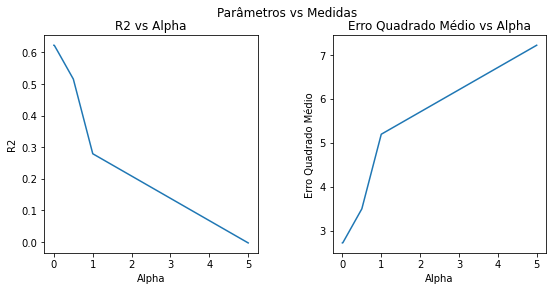

In [23]:
fig, axs = plt.subplots(1,2, figsize=(9,4))
axs[0].plot(resultados['param_alpha'], resultados['mean_test_R2'])
axs[0].set(xlabel='Alpha', ylabel='R2',
       title='R2 vs Alpha')
axs[0].set_title('R2 vs Alpha')
axs[1].plot(resultados['param_alpha'], abs(resultados['mean_test_Erro Quadrado médio']))
axs[1].set(xlabel='Alpha', ylabel='Erro Quadrado Médio',
       title='Erro Quadrado Médio vs Alpha')
fig.suptitle('Parâmetros vs Medidas') 
plt.subplots_adjust(wspace=0.35,hspace=1)

* Mesmo plot anterior só que com menor escala no eixo X para observar as variações nesta com melhor zoom
    * Cada pequeno aumento do hiperparâmetro resulta na reduçao do R2 e aumento do erro

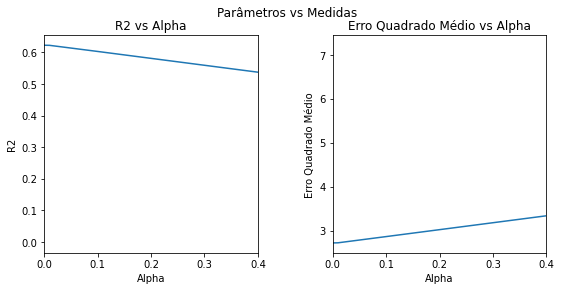

In [24]:
fig, axs = plt.subplots(1,2, figsize=(9,4))
axs[0].plot(resultados['param_alpha'], resultados['mean_test_R2'])
axs[0].set(xlabel='Alpha', ylabel='R2',
       title='R2 vs Alpha')
axs[0].set_title('R2 vs Alpha')
axs[1].plot(resultados['param_alpha'], abs(resultados['mean_test_Erro Quadrado médio']))
axs[1].set(xlabel='Alpha', ylabel='Erro Quadrado Médio',
       title='Erro Quadrado Médio vs Alpha')
axs[0].set_xlim(0,0.4)
axs[1].set_xlim(0,0.4)
fig.suptitle('Parâmetros vs Medidas') 
plt.subplots_adjust(wspace=0.35,hspace=1)

* Identificando como os coeficientes das variáveis variam conforme os valores de hiperparâmetros testados
    * Inicialmente inserindo estes em um dataframe

In [25]:
dados = pd.DataFrame(columns=['alpha','expectativa_anos_estudo','indice_gini','prop_pobreza_extrema','indice_freq_escolar'])
for x in [0.0001,0.001,0.01,0.1,0.5,1,5]:
    lasso = Lasso(alpha = x,max_iter=100000,random_state=0)
    lasso.fit(X_train_escal,y_train)
    dados =  dados.append({'alpha' : x, 'expectativa_anos_estudo' : lasso.coef_[0], 
                           'indice_gini' : lasso.coef_[1],
                            'prop_pobreza_extrema' : lasso.coef_[2], 
                           'indice_freq_escolar' : lasso.coef_[3]}, ignore_index = True)

In [26]:
dados.head()

,alpha,expectativa_anos_estudo,indice_gini,prop_pobreza_extrema,indice_freq_escolar
0,0.0001,-0.389438,0.607608,-2.833710,1.167929
1,0.0010,-0.381581,0.602964,-2.830779,1.158753
2,0.0100,-0.303589,0.556214,-2.800414,1.068048
3,0.1000,0.000000,0.092073,-2.459804,0.596234
4,0.5000,0.000000,-0.000000,-1.856977,0.134424


* Plotar como os coeficientes variam conforme os valores de hiperparâmetros testados

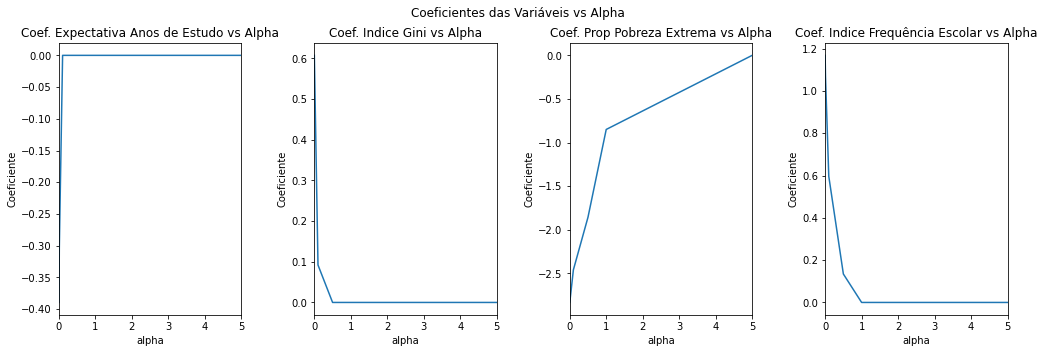

In [27]:
fig, axs = plt.subplots(1,4, figsize=(17,5))
axs[0].plot(dados['alpha'], dados['expectativa_anos_estudo'])
axs[0].set(xlabel='alpha', ylabel='Coeficiente',
       title='Coef. Expectativa Anos de Estudo vs Alpha')
axs[1].plot(dados['alpha'], dados['indice_gini'])
axs[1].set(xlabel='alpha', ylabel='Coeficiente',
       title='Coef. Indice Gini vs Alpha')
axs[2].plot(dados['alpha'], dados['prop_pobreza_extrema'])
axs[2].set(xlabel='alpha', ylabel='Coeficiente',
       title='Coef. Prop Pobreza Extrema vs Alpha')
axs[3].plot(dados['alpha'], dados['indice_freq_escolar'])
axs[3].set(xlabel='alpha', ylabel='Coeficiente',
       title='Coef. Indice Frequência Escolar vs Alpha')
fig.suptitle('Coeficientes das Variáveis vs Alpha')
axs[0].set_xlim(0,5)
axs[1].set_xlim(0,5)
axs[2].set_xlim(0,5)
axs[3].set_xlim(0,5)
plt.subplots_adjust(wspace=0.4,hspace=0.2)
# Coeficientes das variáveis de expectativa de anos de estudo e indice gini são zeradas com pequenos valores do hiperparâmetro
# Assim, a contribuição marginal destas não são tão significativas para o poder de predição do modelo
# A variável de proporção de pobreza extrema é a mais significativa para a predição, dado que seu coeficiente só zera com 
# hiperparâmetro próximo a 5

* Coeficientes das variáveis considerando o melhor ajuste de hiperparâmetro
    * Para o melhor alpha, nenhuma variável teve seu coeficiente zerado
    * Como as variáveis foram escaladas, é possível observar a importância da variável pelo valor absoluto do seu coeficiente

In [28]:
lasso = Lasso(alpha = 0.0001,max_iter=10000,random_state=0)
lasso.fit(X_train_escal,y_train)
lasso.coef_

array([-0.38943832,  0.60760772, -2.83371032,  1.16792905])

In [29]:
lasso.intercept_

array([73.89674822])

* Aplicar o modelo na base de teste, calculando o R2 e Erro Médio nesta

In [30]:
previsoes = lasso.predict(X_test_escal)
erro = mean_squared_error(y_test, previsoes)
print("Erro Quadrado Médio:", erro)
r2 = r2_score(y_test, previsoes)
print("R2:", r2)

Erro Quadrado Médio: 2.801775663931978
R2: 0.6061492342520547


*  Executar uma previsão considerando uma hipotética nova observação

In [31]:
novos_dados = {'expectativa_anos_estudo': [7],
               'indice_gini': [0.4],
             'prop_pobreza_extrema':[15],
              'indice_frequencia_escolar':[0.5]}
novos_dados = pd.DataFrame(data=novos_dados)
escaladas = {}
for col in colunas:
    scaler = RobustScaler()
    scaler.fit(X_train[[col]])
    novos_dados.loc[:,col] = scaler.transform(novos_dados[[col]])
    escaladas[col] = scaler
novas_previsoes = lasso.predict(novos_dados)

In [32]:
novos_dados.head()

,expectativa_anos_estudo,indice_gini,prop_pobreza_extrema,indice_frequencia_escolar
0,-1.684932,-1.0,0.498423,-1.223022


In [33]:
novas_previsoes

array([71.10452937])

* Verificar o comportamento dos erros (valores reais vs valores previstos)

In [34]:
erros = pd.DataFrame(columns=['real','previsto'])

In [35]:
for x,y in zip(previsoes,y_test['expectativa_vida']):
    erros = erros.append({'real': x, 'previsto': y}, ignore_index=True)

In [36]:
erros['erro'] = erros['real'] - erros['previsto']

* Histograma dos erros
    * Os erros situam-se em torno de zero, sem viés aparente

<AxesSubplot:>

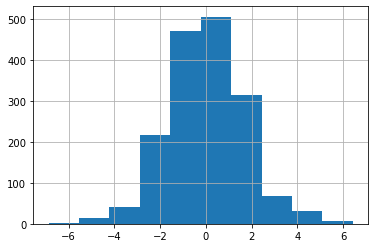

In [37]:
erros['erro'].hist()

<AxesSubplot:xlabel='erro'>

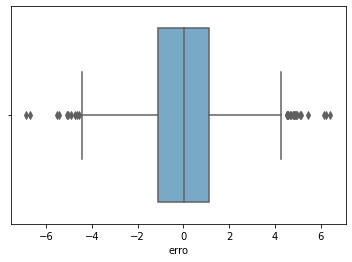

In [38]:
sns.boxplot(x=erros["erro"], palette="Blues")

* Os 90% centrais dos erros estão em até 2

In [39]:
erros['erro'].quantile([.1,.25,.5,.75,0.9])

0.10   -1.986133
0.25   -1.119817
0.50    0.016034
0.75    1.103509
0.90    2.000693
Name: erro, dtype: float64

* Como o modelo não zerou nenhum coeficiente, podemos rodá-lo com todas as variáveis sem a penalização, recuperando a interpretação dos coeficientes

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
reg = LinearRegression().fit(X_train_escal, y_train)
print(reg.score(X_train_escal, y_train)) # retornando o R2 da regressáo linear

0.624266331656058


* Obtendo os coeficiente das variáveis
    * Observa-se que os mesmos estão bem proximos do obtido no metodo com regularização, o que é esperado, visto que o alpha ótimo foi baixo, próximo a zero (modelo sem regularização)

In [42]:
reg.coef_

array([[-0.39031417,  0.60812216, -2.83403104,  1.16895365]])

In [43]:
reg.intercept_ #intercepto do modelo, igualmente semelhante em relação ao modelo com regularização

array([73.89683353])

In [44]:
# Calculando o desempenho da regressão na base de teste

In [45]:
previsoes = reg.predict(X_test_escal)
erro = mean_squared_error(y_test, previsoes)
print("Erro Quadrado Médio:", erro)
r2 = r2_score(y_test, previsoes)
print("R2:", r2)

Erro Quadrado Médio: 2.8017622693291093
R2: 0.6061511171560519


* Com foco mais inferencial, podemos realizar a regressão com os respectivos p-valores dos coeficientes, analisando sua significância

In [46]:
import statsmodels.api as sm

In [47]:
X_train_escal = sm.add_constant(X_train_escal)
model = sm.OLS(y_train, X_train_escal).fit()

In [48]:
model.summary()
# Todas as variáveis foram significativas

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       expectativa_vida   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     1616.
Date:                Sun, 20 Mar 2022   Prob (F-statistic):               0.00
Time:                        00:54:53   Log-Likelihood:                -7469.1
No. Observations:                3895   AIC:                         1.495e+04
Df Residuals:                    3890   BIC:                         1.498e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        73.8968      0.031   2373.728      0.000      73.836      73.958
expectativa_anos_estudo      -0.3903      0.057     -6.833      0.000      -0.502      -0.278
indice_gini                   0.6081      0.046     13.348      0.000       0.519       0.697
prop_pobreza_extrema         -2.8340      0.062    -45.986      0.000      -2.955      -2.713
indice_frequencia_escolar     1.1690      0.076     15.307      0.000       1.019       1.319
==============================================================================
Omnibus:                       52.604   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.138
Skew:                          -0.140   Prob(JB):                     6.54e-18
Kurtosis:                       3.640   Cond. No.                         4.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Testando se há Multicolinearidade

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [50]:
def vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [51]:
#VIF acima de 10 unidades é considerado problemático, indicando a presença de multicolinearidade
vif(X_train_escal.iloc[:,:-1])

,variables,VIF
0,const,1.308458
1,expectativa_anos_estudo,1.422359
2,indice_gini,1.602987
3,prop_pobreza_extrema,1.894819
